In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

### Problem 1:

In [72]:
__fiscalData = pd.read_csv('/Users/mrinal/Downloads/Sdf16_1a.txt', sep='\t')
__fiscalData.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


In [73]:
total_cut = __fiscalData[__fiscalData['TFEDREV'] >0]
total_fed_revenue = total_cut['TFEDREV'].sum()
print('The total federal revenue is', total_fed_revenue)
cut = total_fed_revenue * 0.15
print('Total cut is ', cut)
__revCut = __fiscalData[["LEAID", "TOTALEXP", "TOTALREV","NAME"]].reset_index()
__revCut["Extra"] = __revCut["TOTALREV"] - __revCut["TOTALEXP"]
__revCut = __revCut[__revCut['Extra'] >0]
__revCut.sort_values(by="Extra",ascending=False)

__extra = __revCut['Extra'].sum()
__cutProp = cut/ __extra
__revCut['Cut_Amount'] = __cutProp * __revCut['Extra']
__revCut[['LEAID', 'Cut_Amount']].head()

The total federal revenue is 55602742000
Total cut is  8340411300.0


,LEAID,Cut_Amount
1,100005,8.912264e+05
3,100007,7.692256e+05
4,100008,1.409951e+06
7,100012,1.181606e+05
21,100030,8.306691e+05


In [74]:
__revCut[__revCut['Cut_Amount'] >0]['NAME']

1                            Albertville City
3                                 Hoover City
4                                Madison City
7                                   Boaz City
21                             Alexander City
                         ...                 
18697    Sweetwater County School District #2
18698      Washakie County School District #2
18699         Teton County School District #1
18700        Weston County School District #7
18701      Washakie County School District #1
Name: NAME, Length: 11536, dtype: object

In [75]:
__revCut['PROPORTION'] = __revCut["Cut_Amount"] / __revCut["TOTALREV"]
__revCut[['NAME', 'Cut_Amount','PROPORTION']].sort_values(by="PROPORTION", ascending=False).head()

,NAME,Cut_Amount,PROPORTION
15956,WINDHAM SCHOOL DISTRICT,946171.088831,0.295402
345,Desert Springs Academy,156267.407428,0.295402
12352,ROUGHRIDER AREA CAREER & TECHNICAL CENTER,107821.557110,0.295402
10142,Central Jersey Arts Charter School,101027.322004,0.295402
15838,CHILDREN FIRST ACADEMY OF DALLAS,43424.024370,0.295402


,index,LEAID,TOTALEXP,TOTALREV,NAME,Extra,Cut_Amount,PROPORTION
3126,3126,1300232,75954000,75958000,State Charter Schools- Georgia Cyber Academy,4000,1181.606105,0.000016
7054,7054,2601070,18090000,18091000,Michigan Great Lakes Virtual Academy,1000,295.401526,0.000016
5833,5833,2200047,16940000,16941000,Office of Juvenile Justice,1000,295.401526,0.000017
18127,18127,5400511,14743000,14744000,INSTITUTIONAL EDUCATIONAL PROGRAMS,1000,295.401526,0.000020
18364,18364,5505670,14580000,14581000,Grantsburg School District,1000,295.401526,0.000020


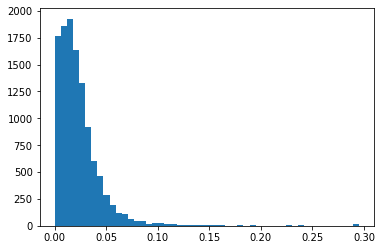

In [82]:
plt.hist(__revCut['PROPORTION'], bins = 50)
__sortedDist = __revCut.sort_values(by = ['PROPORTION'], ascending = 'False')
__sortedDist.head()

### Problem 2:

In [50]:
data = pd.read_csv('/Users/mrinal/Downloads/ccd_lea_052_1516_w_1a_011717.csv')
data.head()

,SURVYEAR,FIPST,STABR,STATENAME,SEANAME,LEAID,ST_LEAID,LEA_NAME,PK,KG,...,BLALF,WH,WHALM,WHALF,HP,HPALM,HPALF,TR,TRALM,TRALF
0,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100002,210,Alabama Youth Services,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100005,101,Albertville City,118,491,...,68,2619,1310,1309,4,0,4,119,66,53
2,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100006,48,Marshall County,154,380,...,24,4331,2228,2103,2,1,1,49,28,21
3,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100007,158,Hoover City,65,942,...,1724,8131,4230,3901,14,5,9,275,140,135
4,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100008,169,Madison City,156,596,...,959,6186,3187,2999,27,14,13,393,182,211


In [65]:
__membData = data[(data.TOTAL > 0)][['STATENAME','LEAID','TOTAL','AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']]

__membData['AM_PROP'] = __membData['AM'] / __membData['TOTAL']
__membData['AS_PROP'] = __membData['AS'] / __membData['TOTAL']
__membData['HI_PROP'] = __membData['HI'] / __membData['TOTAL']
__membData['BL_PROP'] = __membData['BL'] / __membData['TOTAL']
__membData['WH_PROP'] = __membData['WH'] / __membData['TOTAL']
__membData['HP_PROP'] = __membData['HP'] /__membData['TOTAL']
__membData['TR_PROP'] = __membData['TR'] / __membData['TOTAL']
__membData.head()

,STATENAME,LEAID,TOTAL,AM,AS,HI,BL,WH,HP,TR,AM_PROP,AS_PROP,HI_PROP,BL_PROP,WH_PROP,HP_PROP,TR_PROP
1,ALABAMA,100005,5214,14,17,2289,152,2619,4,119,0.002685,0.003260,0.439010,0.029152,0.502301,0.000767,0.022823
2,ALABAMA,100006,5635,26,17,1160,50,4331,2,49,0.004614,0.003017,0.205856,0.008873,0.768589,0.000355,0.008696
3,ALABAMA,100007,13910,10,931,1008,3541,8131,14,275,0.000719,0.066930,0.072466,0.254565,0.584543,0.001006,0.019770
4,ALABAMA,100008,10011,62,862,439,2042,6186,27,393,0.006193,0.086105,0.043852,0.203976,0.617920,0.002697,0.039257
6,ALABAMA,100011,1905,2,13,241,433,1148,5,63,0.001050,0.006824,0.126509,0.227297,0.602625,0.002625,0.033071


AM_PROP


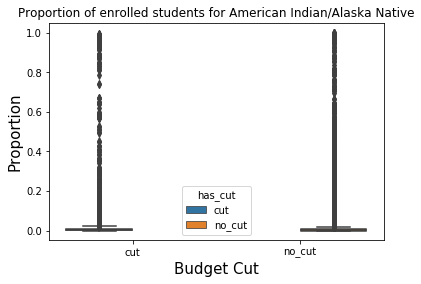

AS_PROP


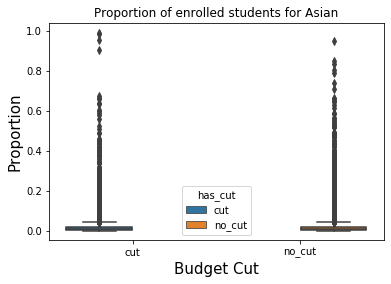

HI_PROP


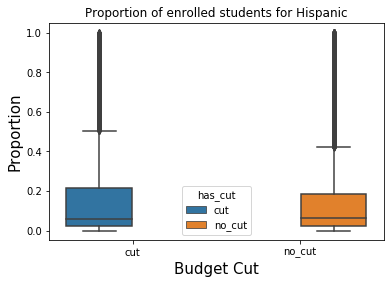

BL_PROP


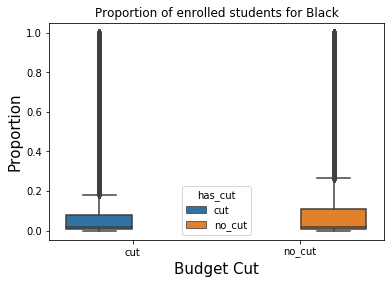

WH_PROP


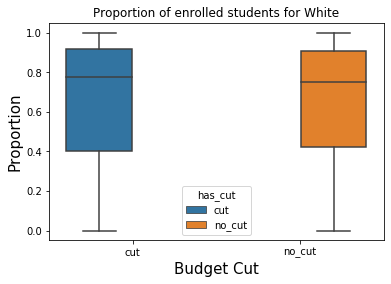

HP_PROP


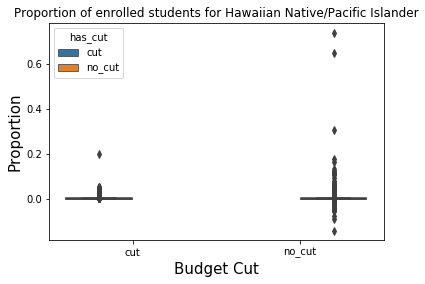

TR_PROP


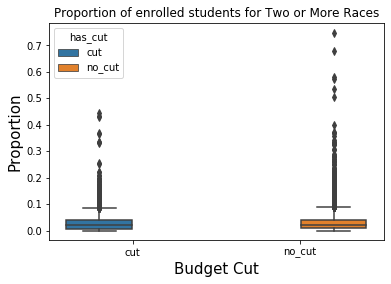

In [66]:
__membRev = __membData.merge(__revCut,on=['LEAID'],how='left')
__raceDict = {'BL': 'Black','AM': 'American Indian/Alaska Native','HP': 'Hawaiian Native/Pacific Islander','AS': 'Asian','HI': 'Hispanic','WH': 'White','TR': 'Two or More Races',
}
__tempCut = __membRev
__tempCut['has_cut'] = np.where(__memRev['LEAID'].isin(__revCut['LEAID']), 'cut', 'no_cut')
for race in ['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']:
    prop_name = race + '_PROP'
    print(prop_name)
    fig, ax = plt.subplots()
    sns.boxplot(x = "has_cut", y = prop_name,hue="has_cut", data = __membRev,ax =ax)  # RUN PLOT  
    plt.xlabel('Budget Cut', fontsize=15)
    plt.ylabel('Proportion', fontsize=15)
    plt.title('Proportion of enrolled students for '+ __raceDict[race])
    plt.show()

### Problem 3:

In [67]:
disability_data = pd.read_csv('/Users/mrinal/Downloads/ccd_lea_002089_1516_w_1a_011717.csv')
disability_data.head()

,SURVYEAR,FIPST,STABR,STATENAME,SEANAME,LEAID,ST_LEAID,LEA_NAME,SPECED
0,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100002,210,Alabama Youth Services,24
1,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100005,101,Albertville City,267
2,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100006,048,Marshall County,430
3,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100007,158,Hoover City,861
4,2015-2016,1,AL,ALABAMA,Alabama Department Of Education,100008,169,Madison City,735


In [61]:
__membRev = __membRev[(__membRev.TOTAL>0)]

In [62]:
merged_df = __membRev.merge(disability_data,on='LEAID',how='left')
disability_df = merged_df[(merged_df['TOTAL'] > 0) & (merged_df['SPECED'] > 0)]

In [63]:
disability_df['prop_dis'] = (disability_df['SPECED'] / disability_df['TOTAL']).fillna(0)

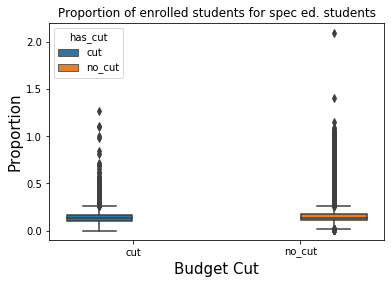

In [64]:
fig, ax = plt.subplots()
sns.boxplot(x="has_cut", y="prop_dis", hue="has_cut", data=disability_df,ax =ax)  # RUN PLOT  
plt.xlabel('Budget Cut', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.title('Proportion of enrolled students for spec ed. students')
plt.show()

### Problem 4:

The asnwer that i decided to critique was: https://github.com/tonytontian/DS5500/blob/master/hw3/hw3.ipynb

Their strategy was to cut off 15% for every distric which got positive number of federal funding, which is similar to the first part of my solution. The advantage was that it is a straightforward way to address the given problem and it is fair to most districts. There are still some disadvantages in this approach. One, it doesn't take return of investment into consideration, meaning that there is no punishment for those who have undesired performance. And it is unfair to districts that performed well based on funding.

### Problem 5:

I would like to talk about the last guest lecture that we had where the pannel provided some really great insights into how to apply to companies, how a lot of titles on job portals do not really demand for applicants to have all the listed skills, which means one should never be intimitated from the titles that recuiters post. They also shared some insights into how the background doesnt really matter when youre looking for a job in the field of data science. Another takeaway was that communication is really important. One should know how to ask the right set of questions, or explain technical concepts to a non-technical person without confusing them and how to talk to higher authorities profesisonally. It was honestly the best guest lecture we had and I would definitely like to get in touch with the pannel for any more insights. 